In [1]:
from sympy import *

init_printing(use_unicode=True)

# Matriz con respecto a la base canónica de la proyección ortogonal sobre un subespacio

$$
\left[P_{gen\{G^{-1}w\}}\right]^{E}_{E}
$$

In [31]:
def matriz_de_proyeccion_ortogonal_en_base_canonica(S, dimension, G=None):
    '''
        w: es el vector que genera al subespacio del cuál queremos obtener la matriz respecto a la base canónica de
           la proyección ortogonal si el producto interno fuese el canónico
            Ejemplo: si S = {x en R^3 : x1 + x2 + x3 = 0} => w = [1, 1, 1]
        dimension: es la dimension del espacio euclídeo en cuestión
        G: es la matriz de Gram del espacio euclídeo en cuestión
    '''
    if S.rank() > 2:
        raise NotImplementedError("Esta función sólo funciona para subespacios de dimensión <= 2")
        
    if not G:
        G = eye(dimension)
        
    if S.rank() == 2:
        S = S.col(0).cross(S.col(1))
        
    G_inv = G.inv()
    return  (1 / (S.T * G_inv * S)[0]) * G_inv * S * S.T

# Ejemplo

En $\mathbb{R}^{3}$ con el producto interno $\langle\cdot, \cdot\rangle$ definido por

$$
\langle x, y \rangle = y^{T} \begin{bmatrix}2 & -2 & 0\\ -2 & 5 & 4\\ 0 & 4 & 6\end{bmatrix} x
$$

se consideran los subespacios
$$
\mathbb{S}_{1} = \{x \in \mathbb{R}^{3} : x_{1} + x_{2} + x_{3} = 0\} \text{ y } \mathbb{S}_{2} = \{x \in \mathbb{R}^{3} : x_{1} - x_{3} = 0\}
$$

3.7 (a) Hallar las matrices con respecto a la base canónica de las proyecciones ortogonales de $\mathbb{R}^{3}$ sobre $\mathbb{S}_{1}^{\perp}$ y sobre $\mathbb{S}_{2}^{\perp}$

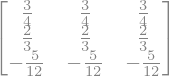

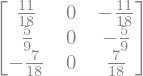

In [33]:
S1_ort = Matrix([1, 1, 1])
S2_ort = Matrix([1, 0, -1])
G = Matrix([[2, -2, 0], [-2, 5, 4], [0, 4, 6]])
dim = 3

P_S1_ort = matriz_de_proyeccion_ortogonal_en_base_canonica(S1, dim, G)
P_S2_ort = matriz_de_proyeccion_ortogonal_en_base_canonica(S2_ort, dim, G)
display(P_S1_ort)
display(P_S2_ort)

# Distancia de un vector a un subespacio





$$
\text{Esta función computa }||P_{\mathbb{S}^{\perp}}(x)|| \text{ a partir de un subespacio } \mathbb{S} \text{ con } dim(\mathbb{S}) \leq 2, \text{ o a partir de } \mathbb{S}^{\perp} \text{ con } dim(\mathbb{S}) \leq 2.
$$

In [19]:
def distancia_de_un_vector_a_un_subespacio(x: Matrix, S, dimension: int, G: Matrix=None):
    '''
        x: es el vector que queremos proyectar sobre el subespacio ortogonal de dimensión 1
        S: es el subespacio que queremos saber a qué distancia de x se encuentra
        dimension: es la dimension del espacio euclídeo en cuestión
        G: es la matriz de Gram del espacio euclídeo en cuestión
        
        Esta función calcula la distancia del vector x al subespacio S, sea S de dimensión 1, o 2
    '''
    if S.rank() > 2:
        raise NotImplementedError("Esta función sólo funciona para subespacios de dimensión <= 2")
        
    if not G:
        G = eye(dimension)
        
    if S.rank() == 2:
        S = S.col(0).cross(S.col(1))
    
    return S.T * x / sqrt((S.T * G.inv() * w)[0]) 

## Ejemplo

Sea $(\mathbb{V}, \langle\cdot, \cdot\rangle)$ un $\mathbb{R}$-espacio euclídeo de dimsensión 3, y sea $\{v_{1}, v_{2}, v_{3}\}$ un base de $\mathbb{V}$ cuya matriz de Gram es

$$
\begin{bmatrix}
    \frac{1}{5} & 0 & \frac{1}{3}\\
    0 & \frac{1}{3} & 0\\
    \frac{1}{3} & 0 & 1\\
\end{bmatrix}
$$

La distancia del vector $2v_{1} + 5v_{2} + 3v_{3}$ al subespacio gen$\{v_{1}, v_{2}\}$ es


In [22]:
r = Rational # Misma función, nombre más corto - Es para que las fracciones no aparezcan en decimal
G_B = Matrix([[r('1/5'), 0, r('1/3')], [0, r('1/3'), 0], [r('1/3'), 0, 1]])
q_B = Matrix([2, 5, 3])
w = Matrix([0, 0, 1])

distancia_de_un_vector_a_un_subespacio(x=q_B, S=w, dimension=3, G=G_B)